In [16]:
import math

def combination(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

# 固定的第一次选择组合数
first_combinations = combination(125, 5)

# 存储结果的列表
probabilities = []

for i in range(6):
    # 共同的i个评委的选择方式
    common_combinations = combination(5, i)
    
    # 在第二次评审中，与第一次不同的评委的选择方式
    second_unique_combinations = combination(125 - 5, 5 - i)
    
    # 计算这种情况的所有可能的组合数
    specific_combinations = common_combinations * second_unique_combinations
    
    # 计算概率
    prob = specific_combinations / first_combinations
    probabilities.append(prob)
total_prob = 0

for i, prob in enumerate(probabilities):
    print(f"概率（共同的评委数 = {i}）= {prob:.10f}")
    total_prob += prob

print(f"概率总和 = {total_prob:.10f}")

概率（共同的评委数 = 0）= 0.8125910883
概率（共同的评委数 = 1）= 0.1751273897
概率（共同的评委数 = 2）= 0.0119745224
概率（共同的评委数 = 3）= 0.0003044370
概率（共同的评委数 = 4）= 0.0000025583
概率（共同的评委数 = 5）= 0.0000000043
概率总和 = 1.0000000000


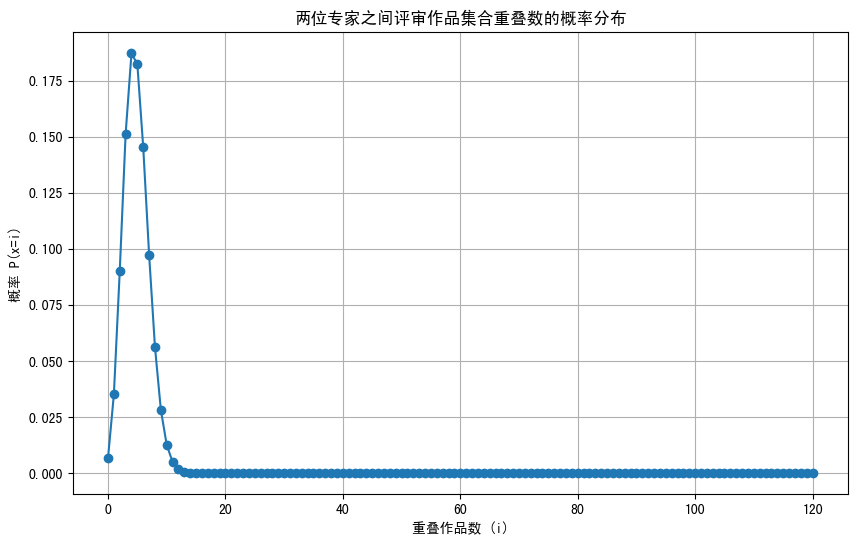

In [27]:
import math
import matplotlib.pyplot as plt

# 设置matplotlib支持显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号

# 定义组合函数
def combination(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

# 计算概率的函数
def probability_i(i):
    return combination(120, i) * combination(2880, 120-i) / combination(3000, 120)

# 计算每个可能的i值的概率
probabilities = [probability_i(i) for i in range(121)]

# 使用matplotlib进行可视化
plt.figure(figsize=(10, 6))
plt.plot(range(121), probabilities, marker='o')
plt.xlabel('重叠作品数 (i)')
plt.ylabel('概率 P(x=i)')
plt.title('两位专家之间评审作品集合重叠数的概率分布')
plt.grid(True)
plt.show()


对于两位专家的选择，我们首先考虑第一位专家从3000个作品中选择120份的情况，这有 $C(3000, 120)$ 种选择方式。

然后，考虑第二位专家的选择，重叠i份作品的情况为：

1. 从第一位专家评审的120份作品中选择i份，这有 $C(120, i)$ 种方式。
2. 对于剩下的2880份作品（因为第一位专家已经选择了120份），选择剩余的120-i份，有 $C(2880, 120-i)$ 种方式。
3. 因此，两位专家的评审作品重叠i份的总的组合数是 $C(120, i) \times C(2880, 120-i)$。

这样，两位专家的评审作品重叠i份的概率是：

\begin{equation}
P(x=i) = \frac{C(120, i) \times C(2880, 120-i)}{C(3000, 120)}
\end{equation}


In [46]:
from scipy.stats import hypergeom

# 定义参数
M = 3000  # 总体大小
n = 120   # 抽样次数
N = 120   # 总体中成功的数量

# 计算期望和方差
mean, var = hypergeom.stats(M, n, N, moments='mv')

print(f"期望(E[X]): {mean}")
print(f"方差(Var[X]): {var}")


期望(E[X]): 4.8
方差(Var[X]): 4.425155051683895


In [7]:
import pandas as pd
import math

# 调整pandas显示设置
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# 总作品数和总专家数
total_works = 3000
total_experts = 125

# 计算每种分组数下的每组作品数和每组专家数
data = {
    '分组数': [],
    '每组作品数': [],
    '每组专家数': []
}

# 分组数范围从1至25
for group_count in range(1, (total_experts // 5) + 1):
    works_per_group = total_works / group_count
    experts_per_group = total_experts / group_count
    
    # 向下取整
    works_per_group = math.floor(works_per_group)
    experts_per_group = math.floor(experts_per_group)

    data['分组数'].append(group_count)
    data['每组作品数'].append(works_per_group)
    data['每组专家数'].append(experts_per_group)

# 使用pandas展示表格
df = pd.DataFrame(data)

# 将"分组数"列设置为表头并删除原始列，然后进行转置
df.set_index('分组数', inplace=True)
df_transposed = df.T
df_transposed

分组数,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
每组作品数,3000,1500,1000,750,600,500,428,375,333,300,272,250,230,214,200,187,176,166,157,150,142,136,130,125,120
每组专家数,125,62,41,31,25,20,17,15,13,12,11,10,9,8,8,7,7,6,6,6,5,5,5,5,5


In [20]:
YOUR_CHOICE = int(input("请选择分组数（1-25）: "))
group_experts = df_transposed[YOUR_CHOICE]['每组专家数']
def combination(n, k):
    # 确保n和k都是非负的
    if n < 0 or k < 0 or k > n:
        return 0
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

total_prob = 0
# 重新计算概率
first_combinations = combination(group_experts, 5)
probabilities = []

for i in range(6):
    # 共同的i个评委的选择方式
    common_combinations = combination(5, i)
    
    # 在第二次评审中，与第一次不同的评委的选择方式
    second_unique_combinations = combination(group_experts - 5, 5 - i)
    
    # 计算这种情况的所有可能的组合数
    specific_combinations = common_combinations * second_unique_combinations
    
    # 计算概率
    prob = specific_combinations / first_combinations
    probabilities.append(prob)

# 显示结果
for i, prob in enumerate(probabilities):
    print(f"概率（共同的评委数 = {i}）= {prob:.10f}")


请选择分组数（1-25）:  12


概率（共同的评委数 = 0）= 0.0039682540
概率（共同的评委数 = 1）= 0.0992063492
概率（共同的评委数 = 2）= 0.3968253968
概率（共同的评委数 = 3）= 0.3968253968
概率（共同的评委数 = 4）= 0.0992063492
概率（共同的评委数 = 5）= 0.0039682540


In [25]:
import pandas as pd
import math

# 调整pandas显示设置
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 总作品数和总专家数
total_works = 3000
total_experts = 125

# 初始化数据
data = {
    '分组数': [],
    '每组作品数': [],
    '每组专家数': [],
    '两篇文章共同评委期望': [],
    '两评委共同文章期望': []
}

for group_count in range(1, (total_experts // 5) + 1):
    works_per_group = total_works / group_count
    experts_per_group = total_experts / group_count
    
    # 向下取整
    works_per_group = math.floor(works_per_group)
    experts_per_group = math.floor(experts_per_group)

    # 计算共同的评委数的期望
    first_combinations = combination(experts_per_group, 5)
    expected_common_judges = sum([i * combination(5, i) * combination(experts_per_group - 5, 5 - i) / first_combinations for i in range(6)])

    # 计算两评委共同文章期望
    m = (works_per_group * 5) / experts_per_group
    expected_common_works = m * (m / works_per_group)

    # 填充数据
    data['分组数'].append(group_count)
    data['每组作品数'].append(works_per_group)
    data['每组专家数'].append(experts_per_group)
    data['两篇文章共同评委期望'].append(expected_common_judges)
    data['两评委共同文章期望'].append(expected_common_works)
for column in ['每组作品数', '每组专家数', '两篇文章共同评委期望', '两评委共同文章期望']:
    data[column] = [round(val, 2) for val in data[column]]

df = pd.DataFrame(data)
df.set_index('分组数', inplace=True)
df_transposed = df.T
df_transposed



分组数,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
每组作品数,3000.0,1500.00,1000.00,750.00,600.0,500.00,428.00,375.00,333.00,300.00,272.00,250.0,230.00,214.00,200.00,187.00,176.00,166.00,157.00,150.00,142.0,136.0,130.0,125.0,120.0
每组专家数,125.0,62.00,41.00,31.00,25.0,20.00,17.00,15.00,13.00,12.00,11.00,10.0,9.00,8.00,8.00,7.00,7.00,6.00,6.00,6.00,5.0,5.0,5.0,5.0,5.0
两篇文章共同评委期望,0.2,0.40,0.61,0.81,1.0,1.25,1.47,1.67,1.92,2.08,2.27,2.5,2.78,3.12,3.12,3.57,3.57,4.17,4.17,4.17,5.0,5.0,5.0,5.0,5.0
两评委共同文章期望,4.8,9.76,14.87,19.51,24.0,31.25,37.02,41.67,49.26,52.08,56.20,62.5,70.99,83.59,78.12,95.41,89.80,115.28,109.03,104.17,142.0,136.0,130.0,125.0,120.0


In [35]:
df_transposed.to_csv('filename.csv', encoding='utf-8-sig')


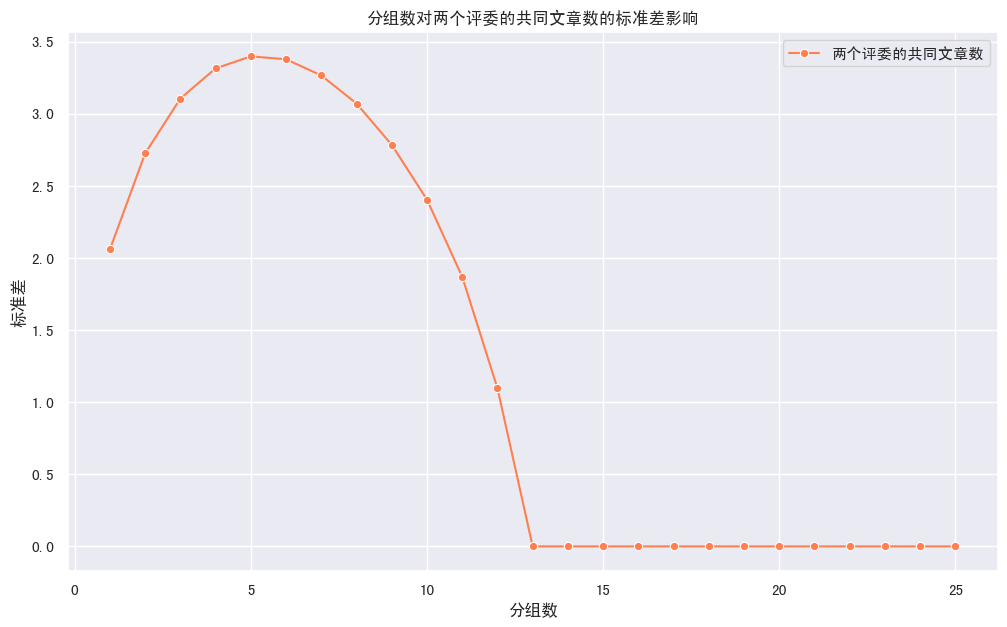

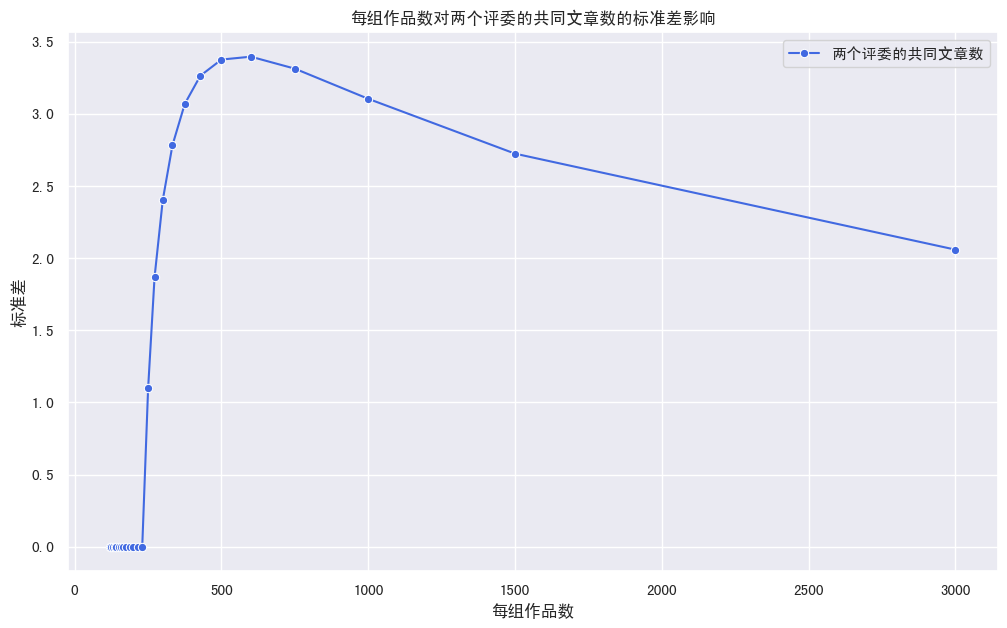

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib.font_manager import FontProperties
# 设置matplotlib和seaborn的字体支持中文显示

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(rc=rc)

sns.set_theme(style="whitegrid")
sns.set(rc=rc)
# ... [其它之前的代码]

# 绘制标准差图 - 两个评委的共同文章数
plt.figure(figsize=(12, 7))
sns.lineplot(x=range(1, 26), y=std_works_list, marker='o', color="coral", label="两个评委的共同文章数")
plt.xlabel('分组数')
plt.ylabel('标准差')
plt.title('分组数对两个评委的共同文章数的标准差影响')
plt.legend()
plt.grid(True)
plt.show()

# 绘制标准差图 - 不同作品数的标准差
plt.figure(figsize=(12, 7))
sns.lineplot(x=df_transposed.loc['每组作品数'], y=std_works_list, marker='o', color="royalblue", label="两个评委的共同文章数")
plt.xlabel('每组作品数')
plt.ylabel('标准差')
plt.title('每组作品数对两个评委的共同文章数的标准差影响')
plt.legend()
plt.grid(True)
plt.show()
